# Welcome to Data Science Club's Fourth Workshop!


Below you'll find the codes from the Fourth and final workshop of the year as well as some comments that I've added as well. If you weren't able to attend the workshop, I hope the comments are enough to help you follow along.

In [ ]:
% matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

The lines above are a routine part of developing your code on jupyter. Before starting any data science project, make sure you import all the packages that you will be using. Packages are a built in unit of code that contain algorithms allowing you to perform actions on your data (sum, mean, median, eigenvalues, etc). The very first line (%matplotlib inline) allows you to view any graphs you generated inside the notebook. For this workshop, we introduce a new package, Scipy, to help introduce statistics into the mix of Data Science


In [ ]:
x = np.linspace(0,100, 101)
print(x)

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.]


This is from the first simple exercise we did. Involving finding Quartiles of a data set. The median, as you may have already learned about is the middle point in a set of data. From the above data set, that point is 50. Another name for the median is the Second Quartile. The Second Quartile in an ordered set of data is the data point where 50% of all points in the set of data are either equal to or less than the given point. The first Quartile is the point in an ordered set of data where 25% of all points in the set of data are either equal to or less than the given point. The Third Quartile is essentially the same thing, only it's the data point where 75% of data is either equal to or less than the given point. 

Given this info, try to find out what the 1st and 3rd Quartiles are in the above set of data. It's as easy as you think!

In [ ]:
df = pd.read_csv('Iris_Data.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here, we use the Iris Data set that we introduced in the first workshop.

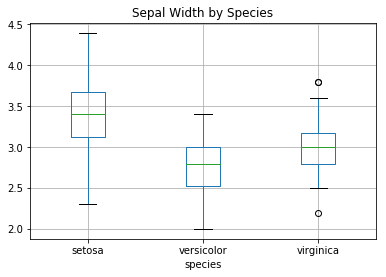

In [ ]:
df.boxplot(column = "sepal_width", by = 'species')
plt.suptitle('')
plt.title("Sepal Width by Species")
plt.show()

If you looked over the notebook from the first workshop, you'll remember that I created a box plot visualizing the Sepal Length of each species of Iris Flower. In this case we visualized the Sepal Width of each flower. Since we aren't touching Data Visualization quite yet, you don't have to try and understand the code we used to visualize the data (Although it would be nice).

Instead, we created a box plot so you can understand what the box plot actually means in terms of the Quartiles we just discussed. The top of the box represents the Third Quartile (Or the point that contains 75% of the data) in the set of data for Sepal Width for each species, and the bottom of the box is the 1st quartile (Or the point that contains 25% of the data). The Green line in the middle of the box is the Median or 2nd Quartile which contains 50% of the data. To get a better understanding of the whiskers that extend out from the box, look at slide on box plots in the powerpoint.

Given what you know about box plots, tell me which species contains outliers in its Sepal Width.

In [ ]:
homicide = pd.read_csv('homicide.csv')

In [ ]:
homicide.head()

,X,Y,Index_,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.392853,43.685028,1,111878,2004,D53,Other,2004-01-03T05:00:00.000Z,98,Rosedale-Moore Park (98),43.685028,-79.392853,1
1,-79.234962,43.781536,2,125755,2004,D42,Shooting,2004-01-08T05:00:00.000Z,137,Woburn (137),43.781536,-79.234962,2
2,-79.206894,43.810860,3,136086,2004,D42,Shooting,2004-01-08T05:00:00.000Z,132,Malvern (132),43.810860,-79.206894,3
3,-79.434403,43.670475,4,148623,2004,D13,Shooting,2004-01-25T05:00:00.000Z,93,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403,4
4,-79.203865,43.823543,5,148619,2004,D42,Shooting,2004-01-25T05:00:00.000Z,131,Rouge (131),43.823543,-79.203865,5


Here, I imported a data set on Homicides that Occurred in Toronto from 2004 - 2018. This data set was released by the Toronto Police. Found Here: http://data.torontopolice.on.ca/pages/open-data. The Goal of this workshop is to create a function that can model the number of homicides that Toronto recieves from year to year.

In [ ]:
yhomicide = homicide.groupby('Occurrence_year')

In [ ]:
count = yhomicide['X'].agg('count')
print(count)

Occurrence_year
2004    64
2005    80
2006    70
2007    86
2008    70
2009    62
2010    65
2011    51
2012    57
2013    57
2014    58
2015    59
2016    75
2017    65
2018    96
Name: X, dtype: int64


Here, I used the Groupby Function that I introduced during the Third Workshop to get a count of murders per year, feel free to look over the notebook from that Workshop to understand the code above. Note that I named this Groupby object with the year and number of suicides as "count".

In [ ]:
x = []
y = []
for entry in count.iteritems():
    x.append(entry[0])
    y.append(entry[1])

print (x)
print(y)

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[64, 80, 70, 86, 70, 62, 65, 51, 57, 57, 58, 59, 75, 65, 96]


Here, I used a For loop to split my data for the Years and the count of Homicides into two different arrays. Using the .iteritems() function, I split my groupby object, count, into a list of lists that looked like this (Year, Count). So by looping over the entries in counts, I took the first number which corresponded to the year using entry[0] and added it to x and took the second entry using entry[1] and added it to y. Feel free to look over the little exercise we did with loops in the first workshop to get a better understanding of the for loop if you feel a little confused.

(51, 96)

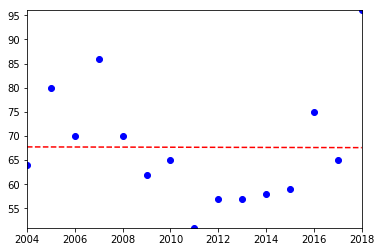

In [ ]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'bo', x, poly1d_fn(x), '--r')
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))

Here, we used the numpy, polyfit function to fit a line of best fit to our data. The way that it does this is by minimizing the Square Error of the Function or the distance between our function (the line) and the data (blue dots) for a given year. As you can see, A line of best didn't do all that good of a job at fitting the data. Let's try using Scipy to fit a quadratic curve.

In [ ]:
def fit_func(x, a, b, c):
    return (a*(x - b)**2 + c)

First, I define a quadratic function that we will use to fit out curve in the form of y = a (x - b)^2 + c

In [ ]:
params = sci.curve_fit(fit_func, x, y)
print (params[0])

a = params[0][0]
b = params[0][1]
c = params[0][2]

[  4.38348412e-01   2.01101222e+03   5.94840975e+01]


We use the scipy function, curve fit to find parameters, a,b,c for our quadratic function that we defined above such that the Error between our model and data is minimized.

In [ ]:
Ynew = []
for year in x:
    Ynew.append(int(fit_func(year, a, b, c)))
print (Ynew)

[81, 75, 70, 66, 63, 61, 59, 59, 59, 61, 63, 66, 70, 75, 80]


Here I use a for loop to create an array for the counts of homicide per year that our model predicts. Try to trace the loop above and understand how I did it!

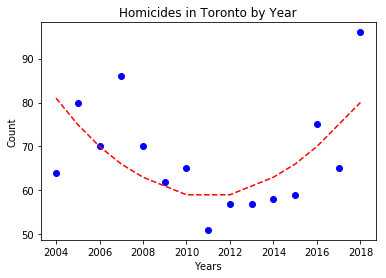

In [ ]:
plt.plot(x,y, 'bo', x, Ynew, '--r')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title ('Homicides in Toronto by Year')
plt.show()

Here is a plot of our model in red vs the data in blue. As you can see, it's still far from perfect but it's a little better than the linear fit from above. Try modifying the fit function and the scipy curve function above and see if you can find parameters to fit quadratic, cubic, etc. functions that could be a better fit for the data!

In [ ]:
z = fit_func(2003, a,b,c)
print(int(z))

87


Above, I used our model to predict how many homicides there were in 2003, and it outputted 87. This is just one example of being able to extrapolate data using a model.

With that, this brings us to the end of our workshop! Thank you all for attending and supporting the Data Science Club. Good luck with your Exams and Happy Holidays!

-Data Science Exec. Team
